In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UCB Files/2022 Fall/IEOR 142/Lab/Week12')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load Data

In [ ]:
jester_train=pd.read_csv("jester_train.csv")
jester_val=pd.read_csv("jester_val.csv")
jester_test=pd.read_csv("jester_test.csv")

jester_train.head()

,Unnamed: 0,user,joke,rating
0,1067276,14785,68,7.62
1,2245073,31024,40,-9.51
2,1125980,15586,2,3.79
3,1254386,17313,40,5.92
4,452534,6278,28,2.62


In [ ]:
jester_train.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
jester_val.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
jester_test.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

jester_train.head()

,index,user,joke,rating
0,1067276,14785,68,7.62
1,2245073,31024,40,-9.51
2,1125980,15586,2,3.79
3,1254386,17313,40,5.92
4,452534,6278,28,2.62


In [ ]:
jester_train.set_index('index', inplace=True)
jester_val.set_index('index', inplace=True)
jester_test.set_index('index', inplace=True)

jester_train.head()

,user,joke,rating
index,,,
1067276,14785,68,7.62
2245073,31024,40,-9.51
1125980,15586,2,3.79
1254386,17313,40,5.92
452534,6278,28,2.62


### 1.1 Convert dataframe to matrices


#### 1.1.1 train set

In [ ]:
jester_train = jester_train.sort_index()
jester_train

,user,joke,rating
index,,,
1,0,1,8.79
2,0,2,-9.66
3,0,3,-8.16
4,0,4,-7.52
5,0,5,-8.50
...,...,...,...
4136355,73420,64,1.36
4136356,73420,65,7.18
4136357,73420,68,0.49


In [ ]:
jester_train_df = jester_train.pivot_table(index="user", columns = "joke", values = "rating")
jester_train_df #rows are users, columns are jokes

joke,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,NaN,NaN,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,NaN,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,NaN,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73416,NaN,NaN,NaN,NaN,5.78,8.45,NaN,8.20,NaN,8.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73417,NaN,NaN,NaN,NaN,5.24,NaN,NaN,5.68,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73418,NaN,NaN,NaN,NaN,-3.93,NaN,-9.03,-2.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
jester_train_mat = jester_train_df.to_numpy() #convert dataframe to matrix
jester_train_mat

array([[  nan,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [ ]:
# sanity check: the number of unique users in the training set
print(len(np.unique(jester_train.user)))
print(jester_train_mat.shape) #num of users, num of jokes

73421
(73421, 100)


In [ ]:
# create a mask for the subset of the data 
jester_train_mask = ~np.isnan(jester_train_mat) 
                # false if value missing, true if rating value avaiable
                # ~:convert T->F and F->T
print(jester_train_mask)
np.sum(jester_train_mask)

[[False  True  True ... False False False]
 [ True  True  True ...  True  True  True]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


3722724

#### 1.1.2. validation set

In [ ]:
jester_val_df = jester_val.pivot_table(index="user", columns = "joke", values = "rating", dropna=False)

In [ ]:
# Some users are not included in the validation or test set, due to the small set size. 
# Therefore, we need to merge the validation and test set with the complete list of users.
user_df = jester_train_df.reset_index()[['user']]

In [ ]:
jester_val_df=pd.merge(user_df,jester_val_df.reset_index(), how='outer',on='user')
jester_val_df=jester_val_df.set_index('user')
print(jester_val_df)
jester_val_mat = jester_val_df.to_numpy()
jester_val_mat

joke     0   1   2   3   4   5   6     7     8     9   ...  90  91  92  93  \
user                                                   ...                   
0     -7.82 NaN NaN NaN NaN NaN NaN   NaN -8.98   NaN  ... NaN NaN NaN NaN   
1       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN  9.22  ... NaN NaN NaN NaN   
2       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN  ... NaN NaN NaN NaN   
3       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN  ... NaN NaN NaN NaN   
4       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN  ... NaN NaN NaN NaN   
...     ...  ..  ..  ..  ..  ..  ..   ...   ...   ...  ...  ..  ..  ..  ..   
73416   NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN  ... NaN NaN NaN NaN   
73417   NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN  ... NaN NaN NaN NaN   
73418   NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN  ... NaN NaN NaN NaN   
73419   NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN  ... NaN NaN NaN NaN   
73420   NaN NaN NaN NaN NaN NaN NaN  7.82   NaN   NaN  ... NaN N

array([[-7.82,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [ ]:
# sanity check: the number of unique users in the training set
print(len(np.unique(jester_val.user))) # the num of users in the original val set
print(jester_val_mat.shape)  # after merge, all users are included in new val set

64072
(73421, 100)


In [ ]:
jester_val_mask = ~np.isnan(jester_val_mat)
np.sum(jester_val_mask) #num of values given

206818

#### 1.1.3. test set

In [ ]:
jester_test = jester_test.sort_index()
jester_test_df = jester_test.pivot_table(index="user", columns = "joke", values = "rating")

In [ ]:
jester_test_df=pd.merge(user_df,jester_test_df.reset_index(),how='outer',on='user')
jester_test_df=jester_test_df.set_index('user')
jester_test_mat = jester_test_df.to_numpy()
jester_test_mat

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
# sanity check: the number of unique users in the training set
print(len(np.unique(jester_test.user)))
print(jester_test_mat.shape)

63799
(73421, 100)


In [ ]:
jester_test_mask = ~np.isnan(jester_test_mat)
np.sum(jester_test_mask)

206818

## 2. Analysis/Modeling

### 2.1 Biscale Centering

#### 2.1.1 Fitting

In [ ]:
! pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 8.4 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=03da088ba19076388b6d1dc75ee30f20acbbdfe2ea2a6526b94a989595c61298
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=7f840a282deeac8c217951048a5ac97418be31fe989a8634c4f4a58f390c4a76
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import BiScaler # simple additive model
jester_biscaler = BiScaler(scale_rows=False, scale_columns=False, verbose=True) 
jester_train_mat_centered = jester_biscaler.fit_transform(jester_train_mat)

[BiScaler] Initial log residual value = 13.262872
[BiScaler] Iter 1: log residual = 5.192479, log improvement ratio=8.070393
[BiScaler] Iter 2: log residual = 1.736193, log improvement ratio=3.456287
[BiScaler] Iter 3: log residual = -1.696396, log improvement ratio=3.432589
[BiScaler] Iter 4: log residual = -5.134444, log improvement ratio=3.438049
[BiScaler] Iter 5: log residual = -8.577467, log improvement ratio=3.443022
[BiScaler] Iter 6: log residual = -12.023553, log improvement ratio=3.446086
[BiScaler] Iter 7: log residual = -15.471356, log improvement ratio=3.447803
[BiScaler] Iter 8: log residual = -18.920092, log improvement ratio=3.448736
[BiScaler] Iter 9: log residual = -22.369327, log improvement ratio=3.449235
[BiScaler] Iter 10: log residual = -25.818829, log improvement ratio=3.449501
[BiScaler] Iter 11: log residual = -29.268472, log improvement ratio=3.449643
[BiScaler] Iter 12: log residual = -32.718190, log improvement ratio=3.449719
[BiScaler] Iter 13: log residu

In [ ]:
# Access the alpha (row_mean) and beta (column) values
print(jester_biscaler.row_means)
print(jester_biscaler.column_means)

[-4.0563674   1.85670453  5.79481109 ...  0.07215497  7.62543926
  3.43792238]
[ 0.88002184  0.20335836  0.13702263 -1.55889359  0.40186422  1.25823208
 -0.46380327 -0.83410596 -0.7333004   1.09197592  1.62627459  1.43219241
 -1.78558413  1.27365104 -1.94791109 -2.94668858 -1.12632167 -0.74718082
  0.34680648 -1.04688869  2.15834856  0.8112097   0.19877532 -1.79468183
  0.36921514  1.21080079  3.08651889  1.30637789  2.76311129 -0.6111657
  2.10861963  2.99368551 -1.50666212  0.94009837  2.86634856  3.07307796
 -1.48786439  1.25753443  1.09564343  0.89781076 -0.50344346  1.85805695
 -0.87100265 -2.06095518  0.96145011  1.36589801  1.3208643   1.70460908
  2.53752982  3.4649919  -0.83649919 -0.21429342  2.73778281  2.4751548
  0.36123346  1.70920616 -2.03648926 -3.76712552 -0.6133534  -0.48995097
  2.07663486  2.7087872   0.15222045 -0.81232519  2.19909255  2.43293151
 -0.93635409  2.43329616  2.39146292  0.53851135 -1.21412516  2.42435842
  0.74915093 -1.78266829 -0.6912309   2.1342240

In [ ]:
jester_train_mat

array([[  nan,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [ ]:
jester_train_mat_centered

array([[        nan, 12.64300904, -5.74065522, ...,         nan,
                nan,         nan],
       [ 1.34327363, -2.35006289,  4.36627284, ..., -2.17977464,
        -5.92318683, -1.58272729],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

#### 2.1.2 Estimation

In [ ]:
import copy
jester_centered_0 = copy.copy(jester_train_mat_centered)
jester_centered_0[np.isnan(jester_centered_0)]=0
jester_centered_0

array([[ 0.        , 12.64300904, -5.74065522, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.34327363, -2.35006289,  4.36627284, ..., -2.17977464,
        -5.92318683, -1.58272729],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
jester_BiScaler_filled = jester_biscaler.inverse_transform(jester_centered_0) 
                                #tranform centered model to original model
jester_BiScaler_filled

array([[-3.17634556,  8.79      , -9.66      , ..., -3.3932973 ,
        -4.30988511, -3.26034464],
       [ 4.08      , -0.29      ,  6.36      , ...,  0.34      ,
        -4.32      ,  1.07      ],
       [ 6.67483293,  5.99816945,  5.93183372, ...,  6.4578812 ,
         5.54129338,  6.59083385],
       ...,
       [ 0.95217681,  0.27551333,  0.2091776 , ...,  0.73522508,
        -0.18136273,  0.86817773],
       [ 8.5054611 ,  7.82879763,  7.76246189, ...,  8.28850937,
         7.37192156,  8.42146202],
       [ 4.31794422,  3.64128074,  3.57494501, ...,  4.10099249,
         3.18440468,  4.23394514]])

### 2.2 Softimpute

In [ ]:
from fancyimpute import SoftImpute #low rank model

jester_soft_imputer = SoftImpute(max_rank=5, verbose=True)
jester_centered_filled = jester_soft_imputer.fit_transform(jester_train_mat_centered)

[SoftImpute] Max Singular Value of X_init = 1908.368905
[SoftImpute] Iter 1: observed MAE=2.993131 rank=5
[SoftImpute] Iter 2: observed MAE=2.935663 rank=5
[SoftImpute] Iter 3: observed MAE=2.924439 rank=5
[SoftImpute] Iter 4: observed MAE=2.910879 rank=5
[SoftImpute] Iter 5: observed MAE=2.899297 rank=5
[SoftImpute] Iter 6: observed MAE=2.889084 rank=5
[SoftImpute] Iter 7: observed MAE=2.885910 rank=5
[SoftImpute] Iter 8: observed MAE=2.884310 rank=5
[SoftImpute] Iter 9: observed MAE=2.882425 rank=5
[SoftImpute] Iter 10: observed MAE=2.876831 rank=5
[SoftImpute] Iter 11: observed MAE=2.877344 rank=5
[SoftImpute] Iter 12: observed MAE=2.873192 rank=5
[SoftImpute] Iter 13: observed MAE=2.874635 rank=5
[SoftImpute] Iter 14: observed MAE=2.873376 rank=5
[SoftImpute] Iter 15: observed MAE=2.868314 rank=5
[SoftImpute] Iter 16: observed MAE=2.868103 rank=5
[SoftImpute] Iter 17: observed MAE=2.867497 rank=5
[SoftImpute] Iter 18: observed MAE=2.870639 rank=5
[SoftImpute] Iter 19: observed MAE=

In [ ]:
jester_centered_filled #predicted value

array([[ 7.47376710e-02,  1.26430090e+01, -5.74065522e+00, ...,
        -1.34677445e+00, -2.49347247e+00, -3.06372413e+00],
       [ 1.34327363e+00, -2.35006289e+00,  4.36627284e+00, ...,
        -2.17977464e+00, -5.92318683e+00, -1.58272729e+00],
       [ 2.23950453e-01, -3.88523596e-01,  1.10397420e+00, ...,
        -9.24778803e-01,  9.89215581e-01, -3.01047143e-01],
       ...,
       [-1.04282878e+00, -7.81549186e-01, -2.63667712e+00, ...,
         1.92585026e-01, -2.48262362e-01, -1.36825360e+00],
       [ 3.65469577e-01, -6.56444369e-01,  1.55258338e+00, ...,
        -6.45745561e-03,  1.09671943e+00,  7.84512212e-01],
       [ 1.86937040e+00,  1.83952318e+00,  2.41533717e+00, ...,
        -1.16942868e+00, -1.31328807e-01, -2.93912533e-01]])

In [ ]:
jester_SoftImpute_filled = jester_biscaler.inverse_transform(jester_centered_filled)
jester_SoftImpute_filled = np.clip(jester_SoftImpute_filled, -10, 10)
jester_SoftImpute_filled

array([[-3.10160789,  8.79      , -9.66      , ..., -4.74007175,
        -6.80335758, -6.32406877],
       [ 4.08      , -0.29      ,  6.36      , ...,  0.34      ,
        -4.32      ,  1.07      ],
       [ 6.89878338,  5.60964586,  7.03580792, ...,  5.53310239,
         6.53050897,  6.28978671],
       ...,
       [-0.09065197, -0.50603585, -2.42749952, ...,  0.92781011,
        -0.42962509, -0.50007587],
       [ 8.87093068,  7.17235326,  9.31504527, ...,  8.28205192,
         8.46864099,  9.20597424],
       [ 6.18731462,  5.48080392,  5.99028217, ...,  2.9315638 ,
         3.05307587,  3.94003261]])

### 2.3 Get test set performance

In [ ]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

### 2.3.1 Performance with Biscale centering only

In [ ]:
jester_test_mae = masked_mae(jester_test_mat, jester_BiScaler_filled, jester_test_mask)
print("Biscale MAE %s " % (jester_test_mae/20)) 
#Note that we normalize MAE and RMSE by the scale of the ratings, which is 10-(-10)=20.

jester_test_mse = masked_mse(jester_test_mat, jester_BiScaler_filled, jester_test_mask)
print("Biscale RMSE %s " % (np.sqrt(jester_test_mse)/20))

baseline_pred = np.mean(jester_train)[2]
baseline_model = baseline_pred*np.ones((73421, 100))
baseline_mse = masked_mse(jester_test_mat, baseline_model, jester_test_mask)
print("Biscale R2 %s" % OSR2(jester_test_mse, baseline_mse))

Biscale MAE 0.17353275658553807 
Biscale RMSE 0.21883777452833306 
Biscale R2 0.31809089580305727


In [ ]:
jester_test_mae = masked_mae(jester_test_mat, jester_SoftImpute_filled, jester_test_mask)
print("SoftImpute MAE %s " % (jester_test_mae/20)) 
#Note that we normalize MAE and RMSE by the scale of the ratings, which is 10-(-10)=20.

jester_test_mse = masked_mse(jester_test_mat, jester_SoftImpute_filled, jester_test_mask)
print("SoftImpute RMSE %s " % (np.sqrt(jester_test_mse)/20))

baseline_pred = np.mean(jester_train)[2]
baseline_model = baseline_pred*np.ones((73421, 100))
baseline_mse = masked_mse(jester_test_mat, baseline_model, jester_test_mask)
print("SoftImpute R2 %s" % OSR2(jester_test_mse, baseline_mse))

SoftImpute MAE 0.16123080031872578 
SoftImpute RMSE 0.21082749936302347 
SoftImpute R2 0.3670980630188805


### 2.4 Cross-validation to choose the best number of Archetypal Users

In [ ]:
jester_test_mae_lst = []
for i in range(20):
    param_cv = i+1
    jester_soft_imputer_cv = SoftImpute(max_rank=param_cv, verbose=False)
    jester_centered_filled_cv = jester_soft_imputer_cv.fit_transform(jester_train_mat_centered)
    jester_filled_cv = jester_biscaler.inverse_transform(jester_centered_filled_cv)
    jester_filled_cv = np.clip(jester_filled_cv, -10, 10)
    jester_test_mae_cv = masked_mae(jester_test_mat, jester_filled_cv, jester_test_mask)
    jester_test_mae_lst.append(jester_test_mae_cv)
    print('iter %s - Validation MAE %s' % (param_cv, jester_test_mae_cv))

iter 1 - Validation MAE 3.3634167055361504
iter 2 - Validation MAE 3.3034357067036195
iter 3 - Validation MAE 3.2511009352785876
iter 4 - Validation MAE 3.2246903981859076
iter 5 - Validation MAE 3.2275107461516837
iter 6 - Validation MAE 3.2229574771900715
iter 7 - Validation MAE 3.220303432899266
iter 8 - Validation MAE 3.2299166726555515
iter 9 - Validation MAE 3.2299216271617057
iter 10 - Validation MAE 3.245674746593222
iter 11 - Validation MAE 3.2649552901165664
iter 12 - Validation MAE 3.274184969724832
iter 13 - Validation MAE 3.2877224471444086
iter 14 - Validation MAE 3.300538647354421
iter 15 - Validation MAE 3.317549435029288
iter 16 - Validation MAE 3.334583278839528
iter 17 - Validation MAE 3.346357029856377
iter 18 - Validation MAE 3.363171229953446
iter 19 - Validation MAE 3.373832245745198
iter 20 - Validation MAE 3.3858449154083172


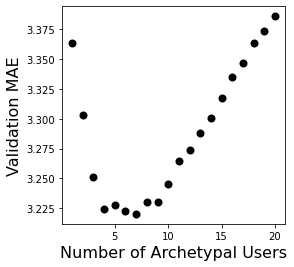

In [ ]:
import matplotlib.pyplot as plt
x = range(1,21)
y = jester_test_mae_lst
plt.figure(figsize=(4, 4))
plt.scatter(x, y, linewidth=2, color='black')
plt.xlabel('Number of Archetypal Users', fontsize=16)
plt.ylabel('Validation MAE', fontsize=16)
plt.show()